<a href="https://colab.research.google.com/github/MayukhDg/Beginner-/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [11]:
single_image = x_train [0]

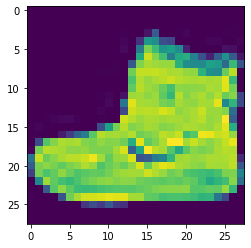

In [12]:
plt.imshow(single_image)

In [13]:
single_image.shape

(28, 28)

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
y_train.shape

(60000,)

In [22]:
from tensorflow.keras.utils import to_categorical

In [35]:
y_example = to_categorical(y_train)

In [36]:
y_example

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
y_example.shape

(60000, 10)

In [38]:
y_cat_test = to_categorical(y_test,10)

In [39]:
y_cat_train = to_categorical(y_train,10)

In [40]:
x_train = x_train/255
x_test = x_test/255

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
x_test.shape

(10000, 28, 28)

In [43]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [44]:
x_test = x_test.reshape(10000,28,28,1)

In [45]:
x_test.shape

(10000, 28, 28, 1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [47]:
model = Sequential()

In [51]:
model.add(Conv2D(kernel_size=(4,4), filters=32, input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [54]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.8418 - accuracy: 0.6990 - val_loss: 0.6283 - val_accuracy: 0.7621
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5693 - accuracy: 0.7886 - val_loss: 0.5522 - val_accuracy: 0.7932
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5087 - accuracy: 0.8149 - val_loss: 0.5070 - val_accuracy: 0.8200
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4704 - accuracy: 0.8313 - val_loss: 0.4884 - val_accuracy: 0.8287
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4455 - accuracy: 0.8405 - val_loss: 0.4603 - val_accuracy: 0.8374
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4276 - accuracy: 0.8461 - val_loss: 0.4514 - val_accuracy: 0.8371
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4132 - accuracy: 0.8524 - val_loss: 0.4331 -

In [56]:
import pandas as pd

In [57]:
losses = pd.DataFrame(model.history.history)

In [59]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.841779,0.698967,0.628325,0.7621
1,0.569337,0.788600,0.552178,0.7932
2,0.508682,0.814950,0.506972,0.8200
3,0.470353,0.831300,0.488437,0.8287
4,0.445512,0.840533,0.460318,0.8374


In [60]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.4441899359226227, 0.8346999883651733]


In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [70]:
predictions[0]

9

In [71]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.70      0.72      1000
           3       0.83      0.89      0.86      1000
           4       0.81      0.59      0.68      1000
           5       0.94      0.95      0.94      1000
           6       0.52      0.72      0.60      1000
           7       0.95      0.86      0.91      1000
           8       0.96      0.94      0.95      1000
           9       0.89      0.98      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.84     10000
weighted avg       0.85      0.83      0.84     10000



In [73]:
confusion_matrix(y_test,predictions)

array([[762,   1,  13,  42,   2,   3, 170,   0,   7,   0],
       [  3, 960,   2,  25,   3,   1,   4,   0,   2,   0],
       [  8,   0, 698,  17,  69,   1, 202,   0,   5,   0],
       [ 26,  12,  11, 891,  22,   0,  36,   0,   2,   0],
       [  2,   1, 120,  50, 592,   0, 229,   0,   6,   0],
       [  0,   0,   0,   1,   0, 946,   0,  23,   1,  29],
       [123,   1,  74,  34,  41,   0, 716,   0,  11,   0],
       [  0,   0,   0,   0,   0,  46,   0, 865,   0,  89],
       [  2,   1,   8,   8,   3,   6,  29,   5, 937,   1],
       [  0,   0,   0,   0,   0,   5,   1,  14,   0, 980]])